In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [67]:
df = pd.read_csv('re.csv')

# Correlation


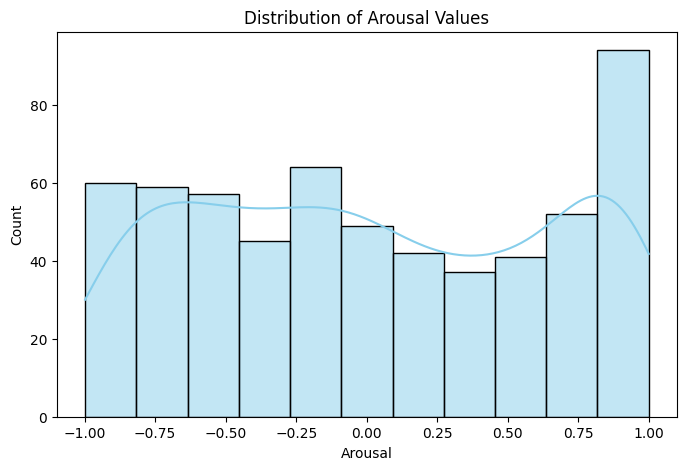

In [7]:


# Plot the distribution of "arousal"
plt.figure(figsize=(8, 5))
sns.histplot(df["arousal"], kde=True, color="skyblue")
plt.title("Distribution of Arousal Values")
plt.xlabel("Arousal")
plt.show()

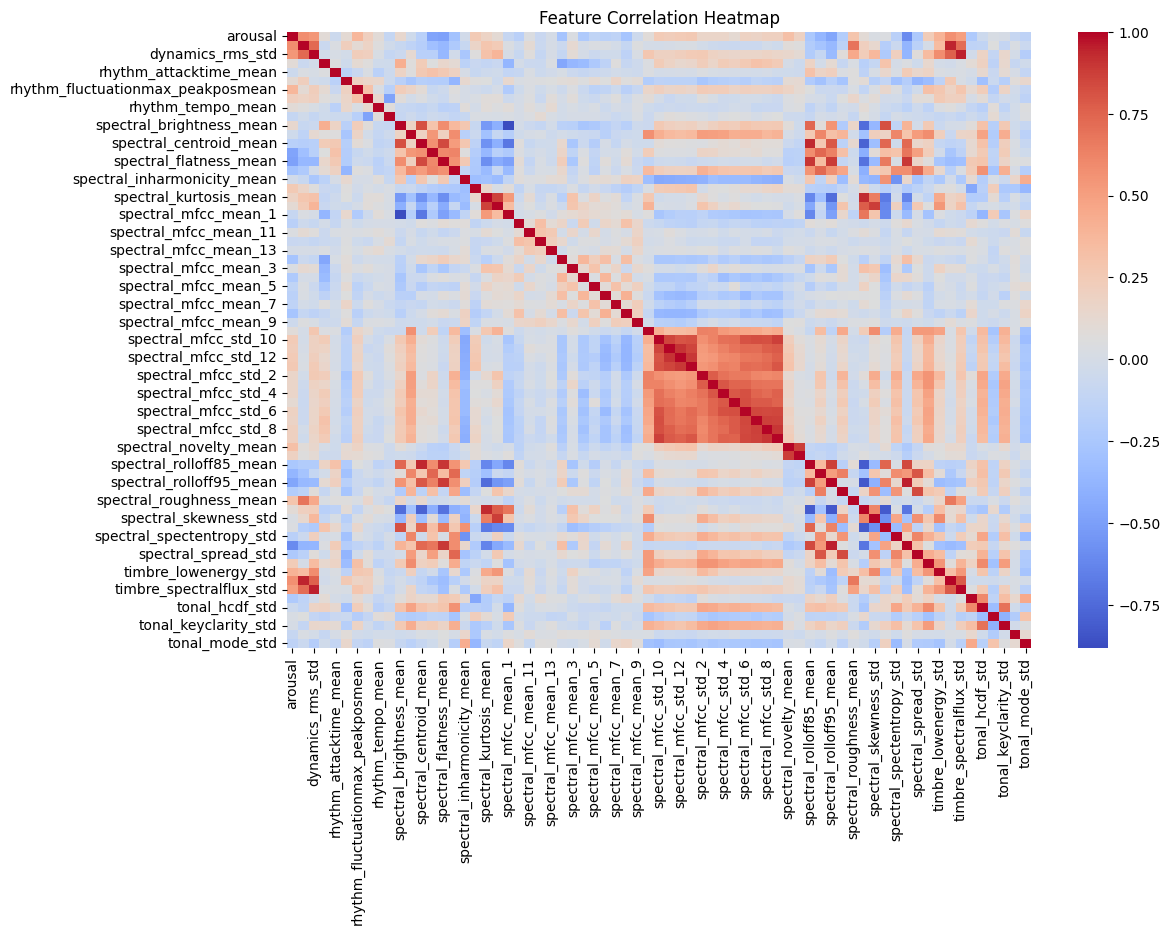

In [8]:
# Compute the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

arousal                              1.000000
dynamics_rms_mean                    0.582004
dynamics_rms_std                     0.542840
rhythm_fluctuationmax_peakposmean    0.378502
spectral_centroid_std               -0.471609
spectral_flatness_mean              -0.490603
spectral_novelty_mean                0.319938
spectral_rolloff85_std              -0.374144
spectral_rolloff95_mean             -0.465598
spectral_spread_mean                -0.598676
timbre_lowenergy_std                 0.401422
timbre_spectralflux_mean             0.573023
timbre_spectralflux_std              0.507003
Name: arousal, dtype: float64


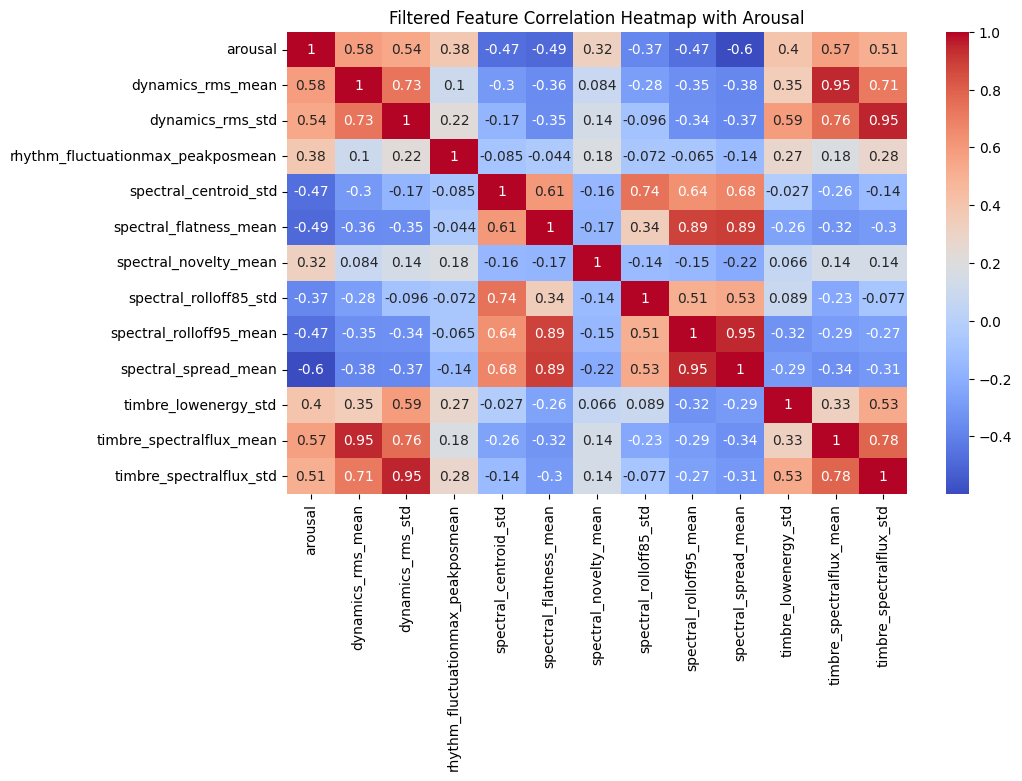

In [9]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract correlations with the target variable 'arousal'
correlation_with_arousal = correlation_matrix['arousal']

# Set a threshold for good correlation (you can adjust the threshold)
threshold = 0.3 # For example, features with correlation above 0.3
good_correlations = correlation_with_arousal[abs(correlation_with_arousal) > threshold]

# Display the features with good correlation with 'arousal'
print(good_correlations)

# Plot the heatmap with only the selected features
selected_features = good_correlations.index
filtered_correlation_matrix = correlation_matrix.loc[selected_features, selected_features]

plt.figure(figsize=(10, 6))
sns.heatmap(filtered_correlation_matrix, cmap="coolwarm", annot=True)
plt.title("Filtered Feature Correlation Heatmap with Arousal")
plt.show()

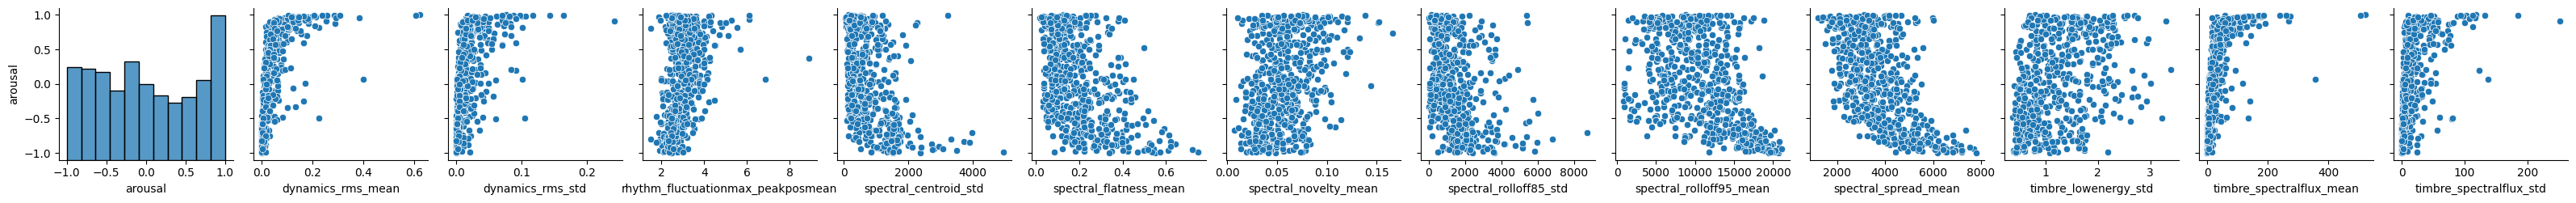

In [11]:
# Select a few key features and the target for visualization
selected_features = list(good_correlations.index)
sns.pairplot(df[selected_features] , y_vars="arousal")
plt.show()

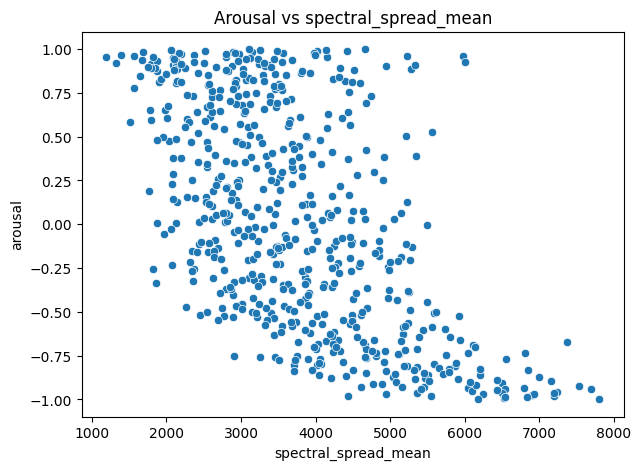

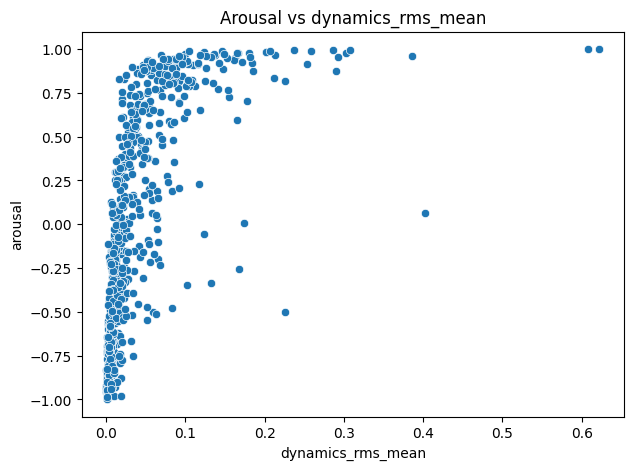

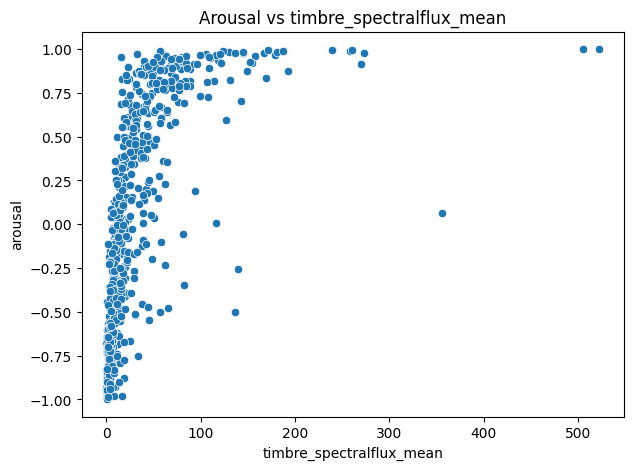

In [12]:
# Plot scatter plots for highly correlated features
top_features = correlation_matrix["arousal"].abs().sort_values(ascending=False).index[1:4]
for feature in top_features:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=df[feature], y=df["arousal"])
    plt.title(f"Arousal vs {feature}")
    plt.show()

<Figure size 1200x1000 with 0 Axes>

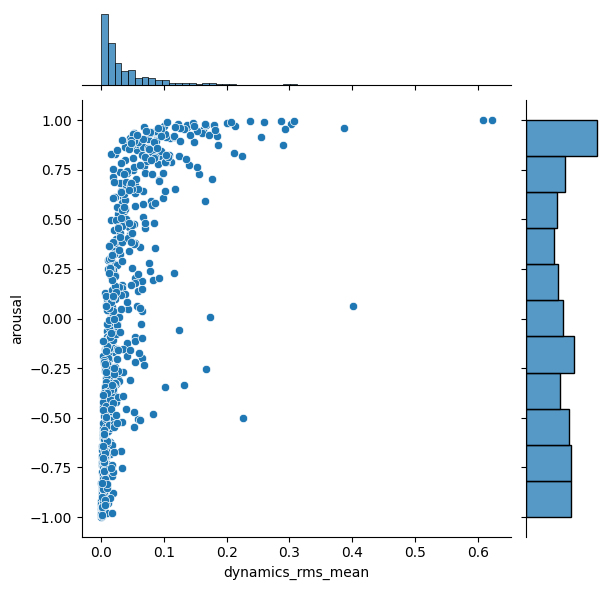

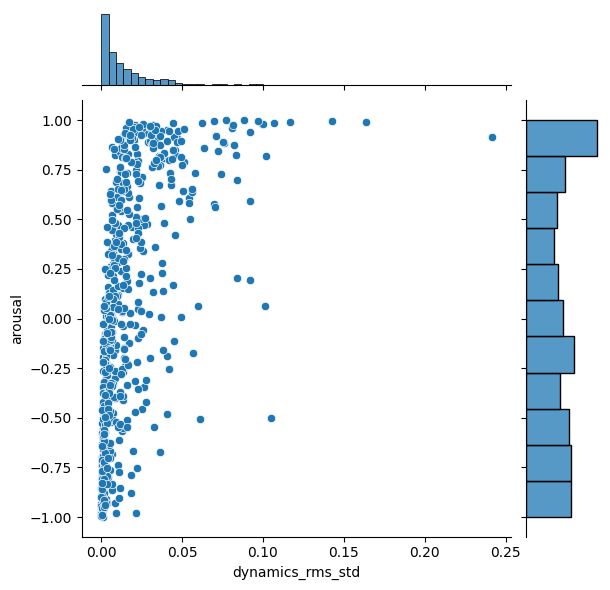

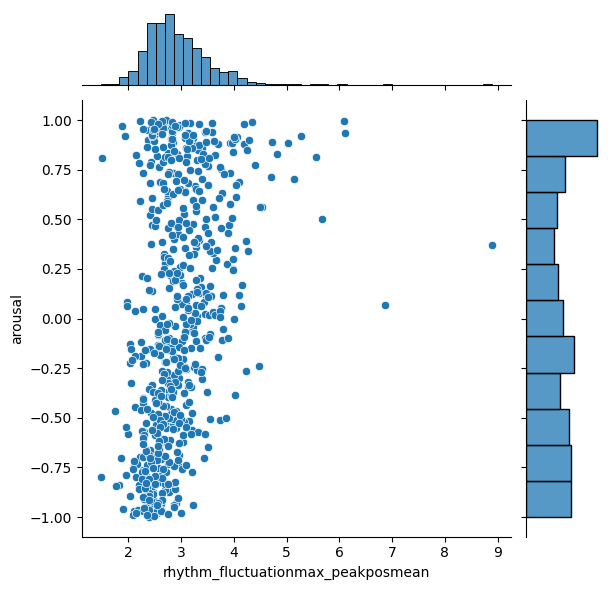

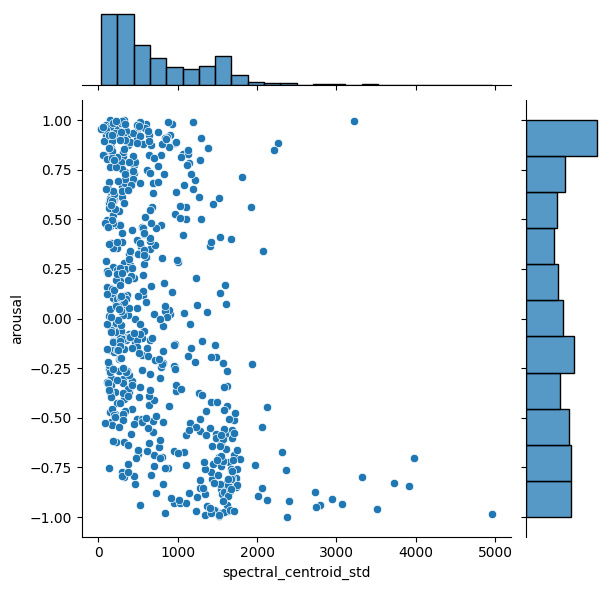

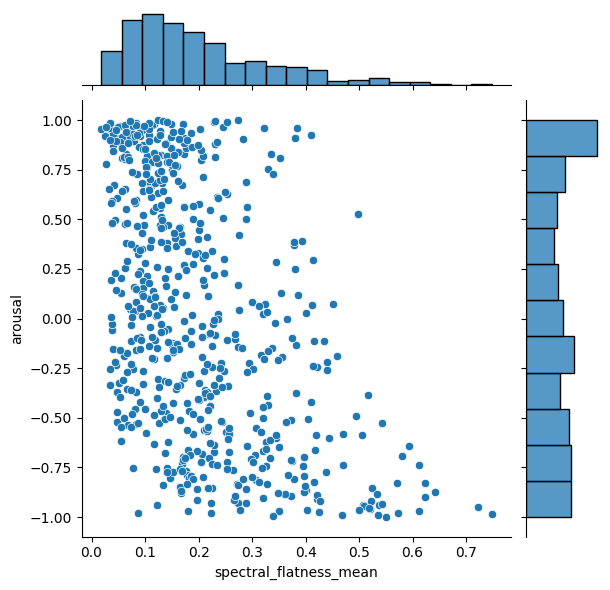

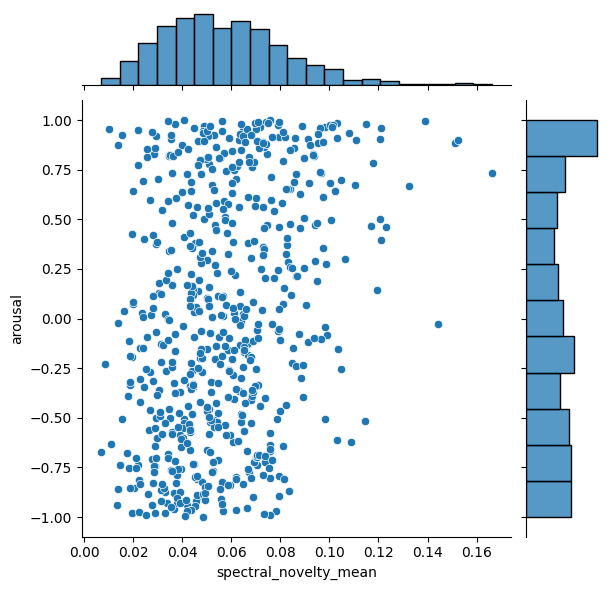

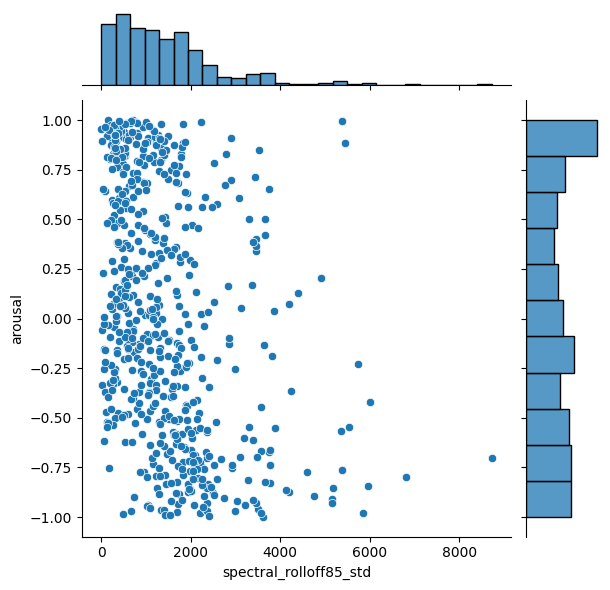

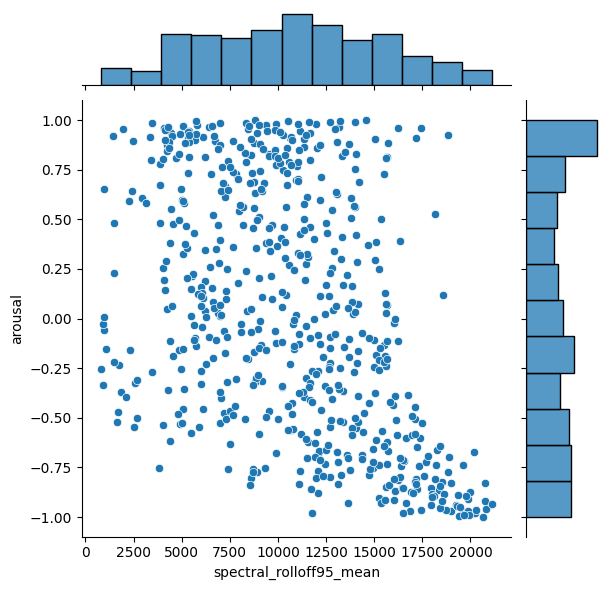

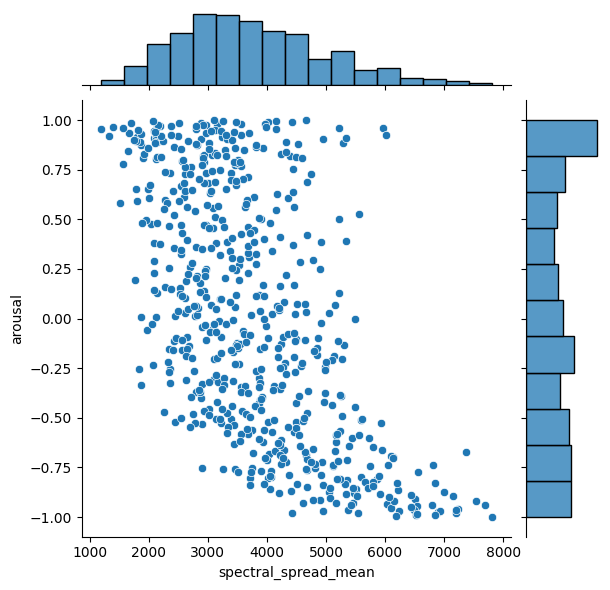

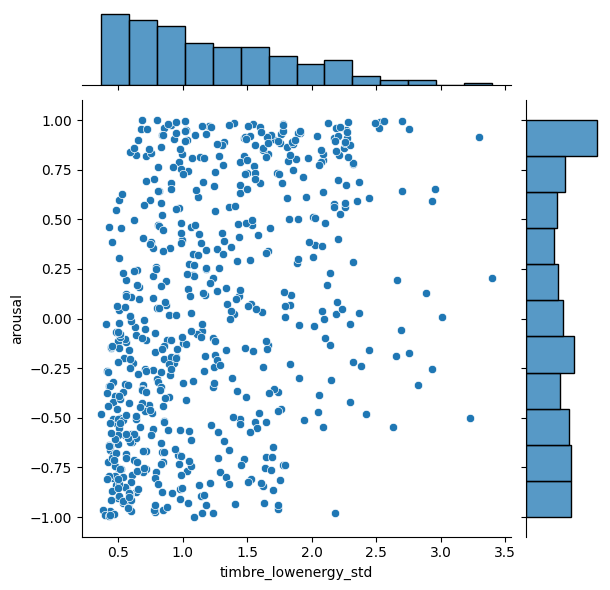

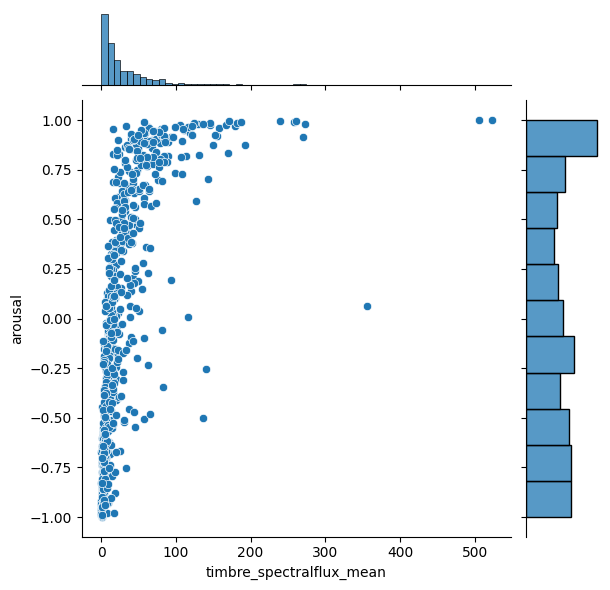

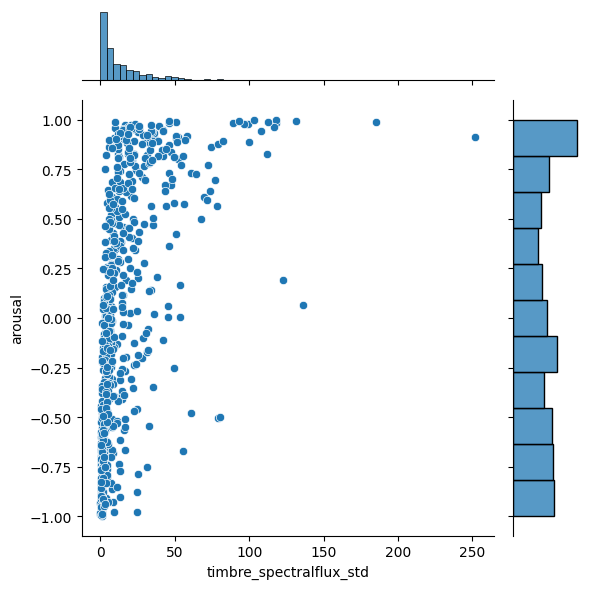

In [13]:

plt.figure(figsize=(12 , 10))


for i, feature in enumerate(selected_features[1:]) :

    sns.jointplot(x= feature, y="arousal", data=df, kind="scatter")


plt.tight_layout()
plt.show()


In [14]:
selected_features

['arousal',
 'dynamics_rms_mean',
 'dynamics_rms_std',
 'rhythm_fluctuationmax_peakposmean',
 'spectral_centroid_std',
 'spectral_flatness_mean',
 'spectral_novelty_mean',
 'spectral_rolloff85_std',
 'spectral_rolloff95_mean',
 'spectral_spread_mean',
 'timbre_lowenergy_std',
 'timbre_spectralflux_mean',
 'timbre_spectralflux_std']

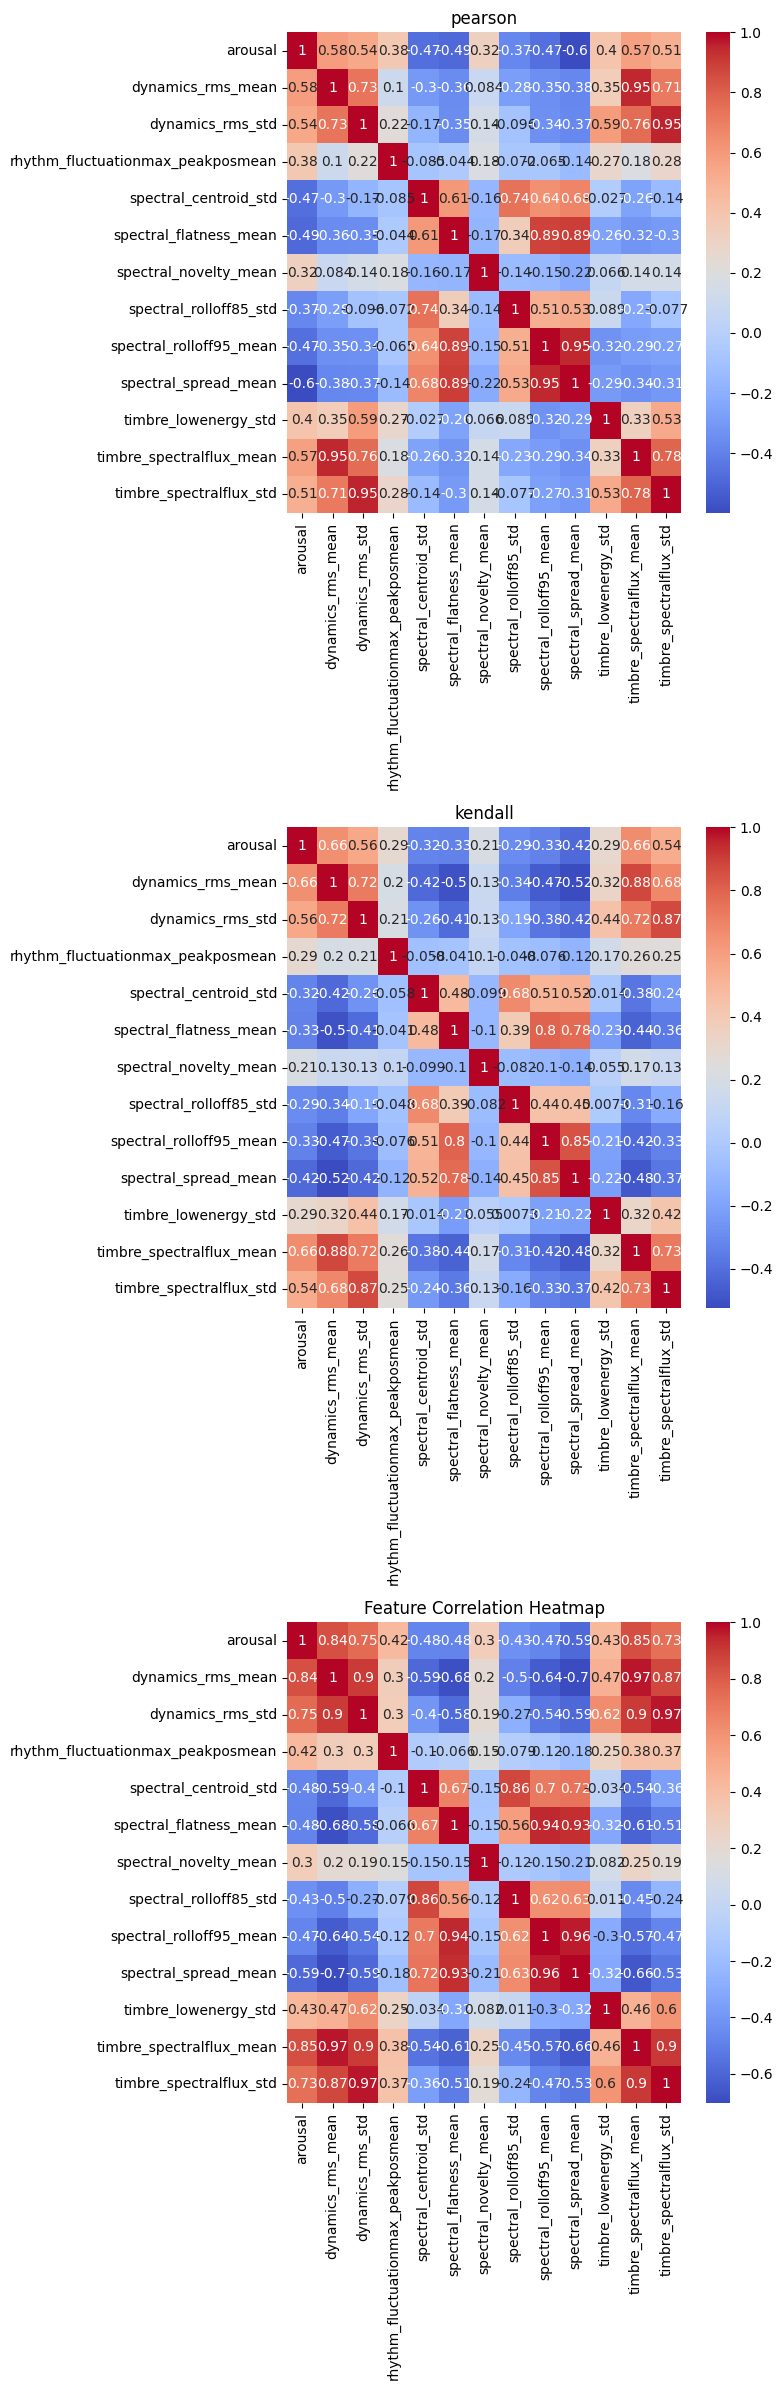

In [20]:
methods = ['pearson', 'kendall', 'spearman']
# Compute the correlation matrix
fig , axes = plt.subplots(3 , 1 , figsize = (8, 24))

for i, m in enumerate(methods) : 
        
    correlation_matrix = df[selected_features].corr(method= m)
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True , ax = axes[i])
    axes[i].set_title(m)

plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [21]:
df[selected_features].to_csv("re2.csv" , index= False)

# Variance Threshold

In [68]:
df = pd.read_csv('re.csv')

In [69]:
df

,arousal,dynamics_rms_mean,dynamics_rms_std,pitch_pitch_mean,rhythm_attacktime_mean,rhythm_eventdensity_mean,rhythm_fluctuationmax_peakposmean,rhythm_pulseclarity_mean,rhythm_tempo_mean,rhythm_tempo_std,...,timbre_lowenergy_mean,timbre_lowenergy_std,timbre_spectralflux_mean,timbre_spectralflux_std,tonal_hcdf_mean,tonal_hcdf_std,tonal_keyclarity_mean,tonal_keyclarity_std,tonal_mode_mean,tonal_mode_std
0,-0.518549,0.013444,0.005903,375.990904,0.016346,1.145663,2.833503,0.136728,105.799224,37.620073,...,5.415367,1.558017,10.204444,5.785453,0.244838,0.321193,0.457834,0.171750,-0.043605,0.068892
1,-0.929101,0.011291,0.008784,855.112001,0.016366,2.127660,2.382534,0.156985,103.708910,20.224905,...,4.652187,0.537740,9.799859,8.441237,0.629594,0.341241,0.440244,0.132387,-0.023940,0.098591
2,-0.940643,0.000291,0.000261,494.090737,0.045209,1.800327,3.222729,0.284216,107.807879,14.880270,...,5.317143,1.175990,0.310226,0.342690,0.451562,0.433910,0.416266,0.162932,-0.032507,0.094219
3,0.475680,0.052846,0.028216,739.893910,0.020400,3.600655,3.233480,0.471585,162.728967,3.858627,...,4.998831,1.429992,45.529733,29.307053,0.337036,0.215957,0.465368,0.129338,-0.031692,0.096302
4,0.901072,0.087529,0.020352,630.302807,0.015339,3.764321,2.374726,0.114023,134.892943,47.667156,...,4.937357,1.028468,67.812560,16.124870,0.195859,0.101366,0.576344,0.150061,-0.086635,0.111011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,-0.073372,0.015475,0.003399,636.193545,0.014104,7.037643,3.246874,0.120837,135.737454,44.650258,...,5.196837,0.781028,12.999301,4.029259,0.331103,0.175998,0.406511,0.117645,-0.026453,0.085638
596,0.055235,0.062676,0.014283,276.636266,0.014952,5.564648,3.130163,0.159736,129.628949,20.652572,...,5.084083,0.815505,47.212848,14.458481,0.288713,0.113454,0.448480,0.133489,-0.017366,0.108680
597,-0.203627,0.024954,0.014806,494.414131,0.016238,2.127660,2.872897,0.159202,77.595825,24.408453,...,4.807854,0.590181,22.532350,14.978432,0.366462,0.193833,0.444842,0.134451,-0.030559,0.106589
598,0.046991,0.032263,0.010465,345.073501,0.014015,3.764321,2.514429,0.214257,128.001316,15.244428,...,5.105844,1.568831,25.641119,8.845998,0.299892,0.122590,0.469182,0.133637,-0.041491,0.105000


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold


feature_names = [f'Feature_{i}' for i in range(df.shape[1])]


# Compute variance of original features
variances = df.var()

# Apply Variance Threshold (removing features with variance < threshold)
threshold = 0.01
selector = VarianceThreshold(threshold=threshold)
X_selected = selector.fit_transform(df)

# Get selected feature names
selected_features = df.columns[selector.get_support()]



In [33]:
selected_features

Index(['arousal', 'pitch_pitch_mean', 'rhythm_eventdensity_mean',
       'rhythm_fluctuationmax_peakposmean', 'rhythm_pulseclarity_mean',
       'rhythm_tempo_mean', 'rhythm_tempo_std', 'spectral_brightness_mean',
       'spectral_centroid_mean', 'spectral_centroid_std',
       'spectral_flatness_mean', 'spectral_irregularity_mean',
       'spectral_kurtosis_mean', 'spectral_kurtosis_std',
       'spectral_mfcc_mean_1', 'spectral_mfcc_mean_10',
       'spectral_mfcc_mean_11', 'spectral_mfcc_mean_12',
       'spectral_mfcc_mean_13', 'spectral_mfcc_mean_2', 'spectral_mfcc_mean_3',
       'spectral_mfcc_mean_4', 'spectral_mfcc_mean_5', 'spectral_mfcc_mean_6',
       'spectral_mfcc_mean_7', 'spectral_mfcc_mean_8', 'spectral_mfcc_mean_9',
       'spectral_mfcc_std_1', 'spectral_mfcc_std_2', 'spectral_mfcc_std_3',
       'spectral_mfcc_std_4', 'spectral_rolloff85_mean',
       'spectral_rolloff85_std', 'spectral_rolloff95_mean',
       'spectral_rolloff95_std', 'spectral_roughness_mean',
   

In [34]:
df[selected_features].to_csv("re_fe_vt.csv",index = False)

# Recursive Feature Elimination

In [70]:
filepath = "re.csv"

print(f"Data : {filepath}")
df = pd.read_csv(filepath)

# Separate features (X) and target (y)
X = df.drop(["arousal"], axis=1)
y = df["arousal"]
feature_names = list(X.columns)


Data : re.csv


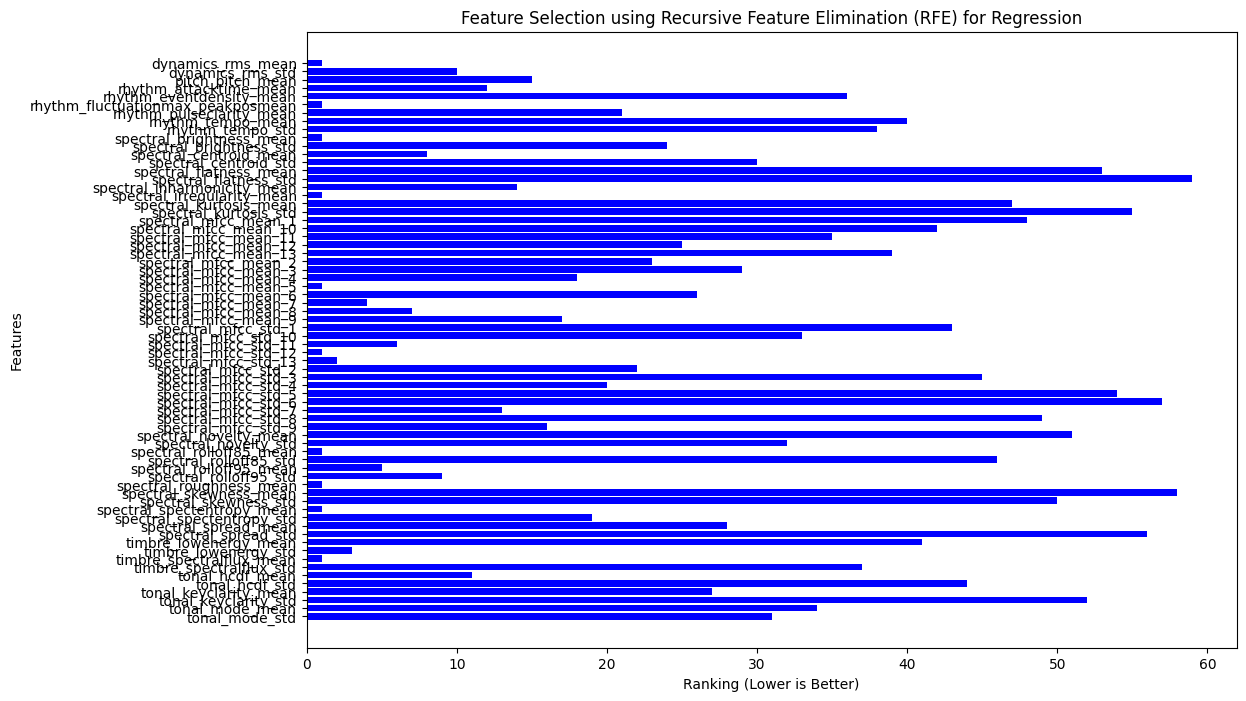

Top 10 selected features: [np.str_('dynamics_rms_mean'), np.str_('rhythm_fluctuationmax_peakposmean'), np.str_('spectral_brightness_mean'), np.str_('spectral_irregularity_mean'), np.str_('spectral_mfcc_mean_5'), np.str_('spectral_mfcc_std_12'), np.str_('spectral_rolloff85_mean'), np.str_('spectral_roughness_mean'), np.str_('spectral_spectentropy_mean'), np.str_('timbre_spectralflux_mean')]


In [71]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply RFE with RandomForestRegressor (or use LinearRegression)
model = RandomForestRegressor(n_estimators=100, random_state=42)
selector = RFE(model, n_features_to_select=10)  # Select top 10 features
selector.fit(X_train, y_train)

# Get selected features and ranking
selected_features = np.array(feature_names)[selector.support_]
ranking = selector.ranking_

# Plot feature ranking
plt.figure(figsize=(12, 8))
plt.barh(feature_names, ranking, color='blue')
plt.xlabel("Ranking (Lower is Better)")
plt.ylabel("Features")
plt.title("Feature Selection using Recursive Feature Elimination (RFE) for Regression")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Print selected features
print(f"Top {len(selected_features)} selected features: {list(selected_features)}")

In [72]:
selected_features = list(selected_features) + ['arousal']

In [73]:
df[selected_features].to_csv("re_fe.csv", index = False)

# XGBoost

In [63]:
filepath = "re.csv"

print(f"Data : {filepath}")
df = pd.read_csv(filepath)

# Separate features (X) and target (y)
X = df.drop(["arousal"], axis=1)
y = df["arousal"]
feature_names = list(X.columns)


Data : re.csv


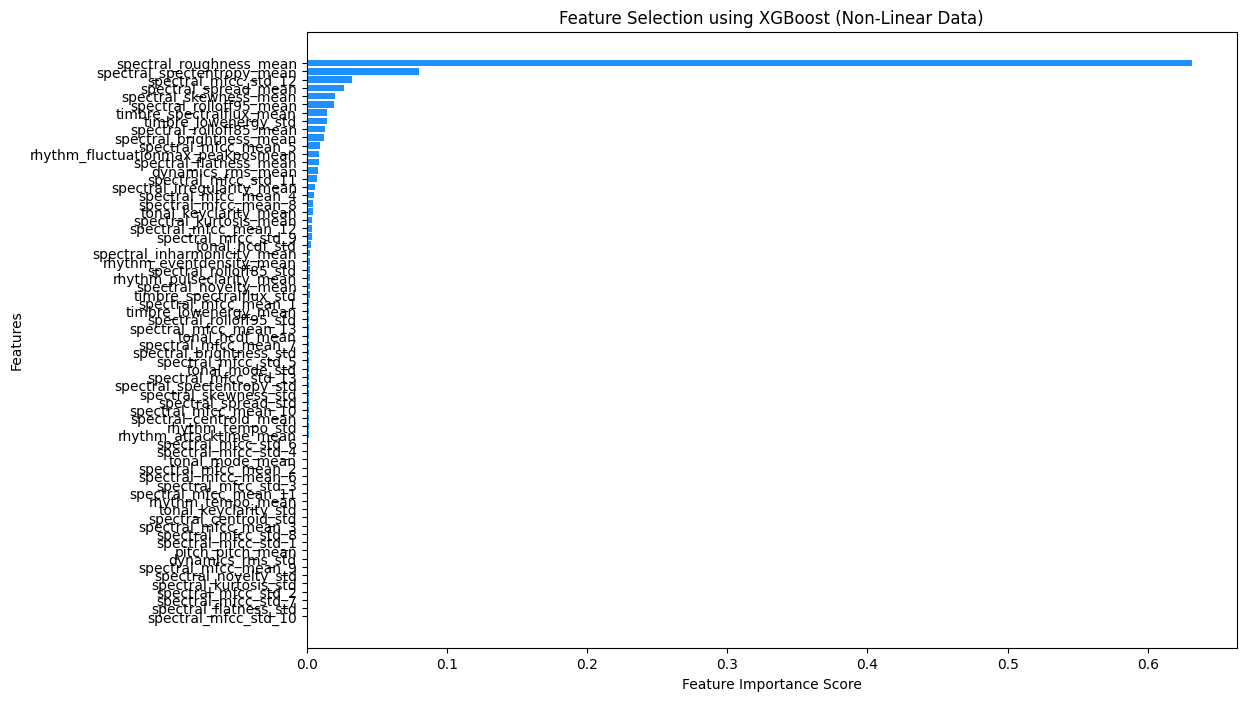

Top 10 selected features: ['spectral_roughness_mean', 'spectral_spectentropy_mean', 'spectral_mfcc_std_12', 'spectral_spread_mean', 'spectral_skewness_mean', 'spectral_rolloff95_mean', 'timbre_spectralflux_mean', 'timbre_lowenergy_std', 'spectral_rolloff85_mean', 'spectral_brightness_mean']


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_k = 10
selected_features = importance_df.head(top_k)['Feature'].values

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='dodgerblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Selection using XGBoost (Non-Linear Data)")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Print selected features
print(f"Top {top_k} selected features: {list(selected_features)}")

In [65]:
selected_features = list(selected_features) + ['arousal']

In [ ]:
df[selected_features].to_csv("re_fe.csv", index = False)